In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [38]:
data = pd.read_csv("updated_courses_with_multiple_providers.csv")
data.head()

,User_ID,Skill_Level,Learning_Pace,Career_Goal,Preferred_Medium,Available_Time,Course_Title,Course_Provider,Skill_Taught,Difficulty_Level,Medium,Duration
0,1,3,3,Frontend Development,Offline,9,Frontend Essentials,Coursera,"HTML, CSS, JavaScript",2,Offline,44
1,2,1,2,Frontend Development,Online,7,Frontend Essentials,edX,"HTML, CSS, JavaScript",1,Online,22
2,3,3,3,Frontend Development,Online,39,Frontend Essentials,LinkedIn Learning,"HTML, CSS, JavaScript",2,Online,40
3,4,3,1,Frontend Development,Offline,19,Frontend Essentials,Coursera,"HTML, CSS, JavaScript",1,Offline,47
4,5,1,2,Frontend Development,Online,30,Frontend Essentials,edX,"HTML, CSS, JavaScript",3,Online,19


In [39]:
data.shape

(1000, 12)

In [40]:
data['Course_Title'].value_counts()

,count
Course_Title,
System Design Mastery,113
AI Advanced Concepts,107
Cybersecurity Basics,107
Cloud Foundations,104
Database Management,103
Testing Fundamentals,103
Data Science for All,97
DevOps Masterclass,94
Frontend Essentials,89


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           1000 non-null   int64 
 1   Skill_Level       1000 non-null   int64 
 2   Learning_Pace     1000 non-null   int64 
 3   Career_Goal       1000 non-null   object
 4   Preferred_Medium  1000 non-null   object
 5   Available_Time    1000 non-null   int64 
 6   Course_Title      1000 non-null   object
 7   Course_Provider   1000 non-null   object
 8   Skill_Taught      1000 non-null   object
 9   Difficulty_Level  1000 non-null   int64 
 10  Medium            1000 non-null   object
 11  Duration          1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [42]:
data.describe()

,User_ID,Skill_Level,Learning_Pace,Available_Time,Difficulty_Level,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.001000,1.997000,22.503000,2.058000,29.959000
std,288.819436,0.832882,0.829264,10.240159,0.802047,11.749441
min,1.000000,1.000000,1.000000,5.000000,1.000000,10.000000
25%,250.750000,1.000000,1.000000,14.000000,1.000000,20.000000
50%,500.500000,2.000000,2.000000,22.000000,2.000000,29.000000
75%,750.250000,3.000000,3.000000,31.000000,3.000000,41.000000
max,1000.000000,3.000000,3.000000,40.000000,3.000000,50.000000


In [43]:
# One-Hot Encoding for categorical columns (e.g., Career_Goal, Preferred_Medium, Skill_Taught)
df_encoded = pd.get_dummies(data, columns=['Preferred_Medium','Medium','Career_Goal', 'Skill_Taught'])
df_encoded.drop(columns=['User_ID'], inplace=True)


In [44]:
df_encoded.head()

,Skill_Level,Learning_Pace,Available_Time,Course_Title,Course_Provider,Difficulty_Level,Duration,Preferred_Medium_Offline,Preferred_Medium_Online,Medium_Offline,...,Skill_Taught_Automated Testing,Skill_Taught_CI/CD Pipelines,Skill_Taught_Cloud Infrastructure,Skill_Taught_Deep Learning,"Skill_Taught_HTML, CSS, JavaScript",Skill_Taught_Machine Learning,Skill_Taught_Penetration Testing,"Skill_Taught_SQL, NoSQL",Skill_Taught_Scalable Architectures,Skill_Taught_Server-side Logic
0,3,3,9,Frontend Essentials,Coursera,2,44,True,False,True,...,False,False,False,False,True,False,False,False,False,False
1,1,2,7,Frontend Essentials,edX,1,22,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,3,3,39,Frontend Essentials,LinkedIn Learning,2,40,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,3,1,19,Frontend Essentials,Coursera,1,47,True,False,True,...,False,False,False,False,True,False,False,False,False,False
4,1,2,30,Frontend Essentials,edX,3,19,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [45]:
# Instantiate Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Columns to scale
columns_to_scale = ['Skill_Level', 'Learning_Pace', 'Available_Time', 'Difficulty_Level']

# Scale the features
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])


In [46]:
df_encoded.head()

,Skill_Level,Learning_Pace,Available_Time,Course_Title,Course_Provider,Difficulty_Level,Duration,Preferred_Medium_Offline,Preferred_Medium_Online,Medium_Offline,...,Skill_Taught_Automated Testing,Skill_Taught_CI/CD Pipelines,Skill_Taught_Cloud Infrastructure,Skill_Taught_Deep Learning,"Skill_Taught_HTML, CSS, JavaScript",Skill_Taught_Machine Learning,Skill_Taught_Penetration Testing,"Skill_Taught_SQL, NoSQL",Skill_Taught_Scalable Architectures,Skill_Taught_Server-side Logic
0,1.0,1.0,0.114286,Frontend Essentials,Coursera,0.5,44,True,False,True,...,False,False,False,False,True,False,False,False,False,False
1,0.0,0.5,0.057143,Frontend Essentials,edX,0.0,22,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,1.0,1.0,0.971429,Frontend Essentials,LinkedIn Learning,0.5,40,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,1.0,0.0,0.400000,Frontend Essentials,Coursera,0.0,47,True,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0.0,0.5,0.714286,Frontend Essentials,edX,1.0,19,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [47]:
# Define features (X) and target (y)
df_encoded[df_encoded.select_dtypes(include=[bool]).columns] = df_encoded.select_dtypes(include=[bool]).astype(int)
x = df_encoded.drop(columns=['Course_Title', 'Course_Provider'])  # Drop the target column

y= df_encoded['Course_Title'] = df_encoded['Course_Title']

y.head()


,Course_Title
0,Frontend Essentials
1,Frontend Essentials
2,Frontend Essentials
3,Frontend Essentials
4,Frontend Essentials


In [48]:
x

,Skill_Level,Learning_Pace,Available_Time,Difficulty_Level,Duration,Preferred_Medium_Offline,Preferred_Medium_Online,Medium_Offline,Medium_Online,Career_Goal_AI and Machine Learning,...,Skill_Taught_Automated Testing,Skill_Taught_CI/CD Pipelines,Skill_Taught_Cloud Infrastructure,Skill_Taught_Deep Learning,"Skill_Taught_HTML, CSS, JavaScript",Skill_Taught_Machine Learning,Skill_Taught_Penetration Testing,"Skill_Taught_SQL, NoSQL",Skill_Taught_Scalable Architectures,Skill_Taught_Server-side Logic
0,1.0,1.0,0.114286,0.5,44,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,0.5,0.057143,0.0,22,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,1.0,0.971429,0.5,40,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,0.0,0.400000,0.0,47,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,0.5,0.714286,1.0,19,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.600000,1.0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
996,0.0,0.0,0.142857,1.0,20,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
997,0.5,0.0,0.657143,0.0,11,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
998,0.5,0.5,0.200000,0.5,44,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.02)

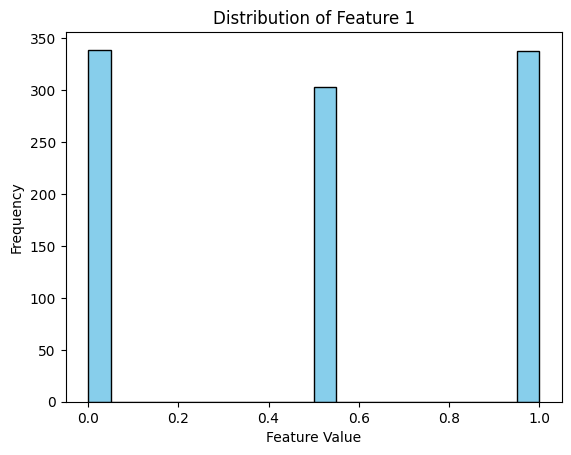

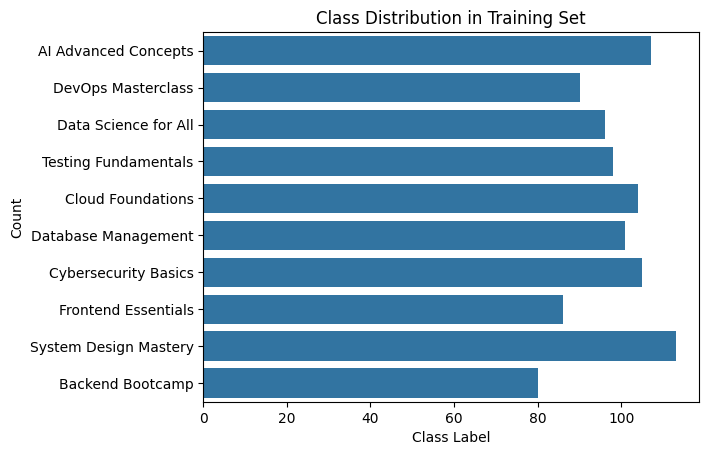

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example histogram for a feature
# plt.hist(x_train[:, 0], bins=20, color='skyblue', edgecolor='black')  # Assuming `x_train` is a numpy array


# For pandas DataFrame
plt.hist(x_train.iloc[:, 0], bins=20, color='skyblue', edgecolor='black')

# For NumPy array
# plt.hist(x_train[:, 0], bins=20, color='skyblue', edgecolor='black')


plt.title('Distribution of Feature 1')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()

# Example bar plot for class distribution
sns.countplot(y=y_train)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()


In [51]:
x_train.shape

(980, 29)

In [52]:
x_test.shape

(20, 29)

In [53]:
y_train.head()

,Course_Title
141,AI Advanced Concepts
504,DevOps Masterclass
191,AI Advanced Concepts
651,Data Science for All
800,Testing Fundamentals


In [54]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
pred = model.predict(x_test)

In [56]:
pred[0:5]

array(['Frontend Essentials', 'Database Management',
       'AI Advanced Concepts', 'Testing Fundamentals',
       'Cybersecurity Basics'], dtype=object)

In [57]:
y_test[0:5]

,Course_Title
26,Frontend Essentials
351,Database Management
427,Backend Bootcamp
832,Testing Fundamentals
237,Cybersecurity Basics


In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
accuracy

0.9

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 1, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 5]])

In [60]:
correct_sum = []
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    correct = np.sum(pred == y_test)
    correct_sum.append(correct)

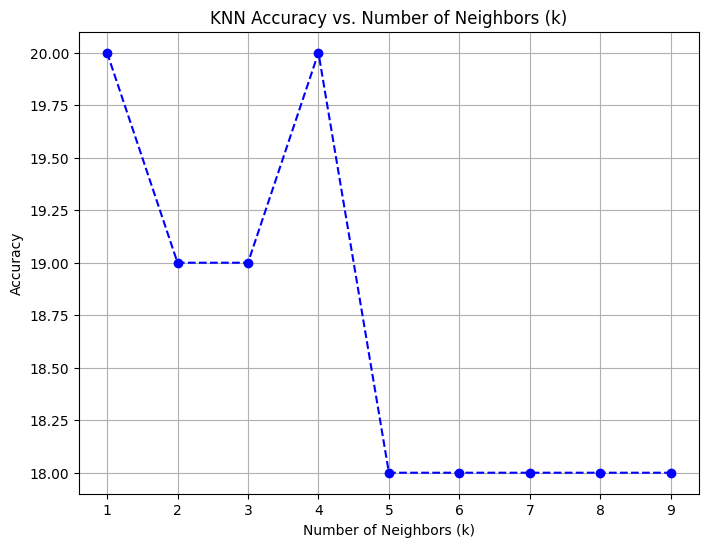

In [61]:

k_values = range(1, 10)
plt.figure(figsize=(8, 6))
plt.plot(k_values, correct_sum, marker='o', linestyle='--', color='b')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [62]:
correct_sum

[20, 19, 19, 20, 18, 18, 18, 18, 18]

In [63]:
result = pd.DataFrame(data=correct_sum)
result.index = result.index+1
result.T

,1,2,3,4,5,6,7,8,9
0,20,19,19,20,18,18,18,18,18


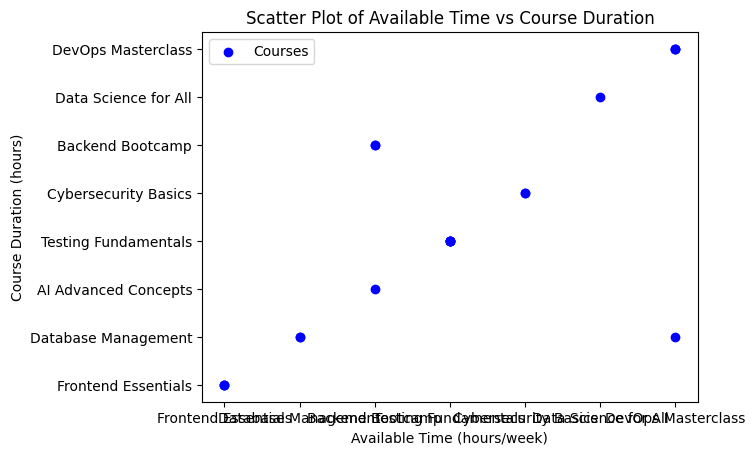

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset (use your own DataFrame here)
df = pd.DataFrame({
    'Available_Time': [20, 15, 25, 10, 5, 30, 10, 20, 25, 20],
    'Duration': [20, 15, 40, 10, 5, 30, 10, 20, 25, 20],
    'Skill_Level': [1, 2, 3, 1, 2, 3, 1, 2, 3, 1],
    'Learning_Pace': [2, 3, 1, 2, 1, 3, 2, 3, 1, 2]
})

# Create a scatter plot of Available_Time vs Duration
plt.scatter(y_test, pred, color='blue', label='Courses')

# Add labels and title
plt.xlabel('Available Time (hours/week)')
plt.ylabel('Course Duration (hours)')
plt.title('Scatter Plot of Available Time vs Course Duration')

# Show the plot
plt.legend()
plt.show()


In [65]:
import joblib

In [66]:
joblib.dump(model, 'knn_model.joblib')

['knn_model.joblib']

In [67]:
loaded_model = joblib.load('knn_model.joblib')

# Use the loaded model for predictions
predictions = loaded_model.predict(x_test)
print(predictions)

['Frontend Essentials' 'Database Management' 'AI Advanced Concepts'
 'Testing Fundamentals' 'Cybersecurity Basics' 'Backend Bootcamp'
 'Data Science for All' 'Testing Fundamentals' 'DevOps Masterclass'
 'DevOps Masterclass' 'Testing Fundamentals' 'Testing Fundamentals'
 'DevOps Masterclass' 'Frontend Essentials' 'Database Management'
 'Testing Fundamentals' 'Frontend Essentials' 'Cybersecurity Basics'
 'Backend Bootcamp' 'Database Management']


In [68]:

# Load the dataset
data = pd.read_csv("updated_courses_with_multiple_providers.csv")

# Encode categorical columns (like 'Career_Goal') using LabelEncoder
encoder = LabelEncoder()
data['Career_Goal'] = encoder.fit_transform(data['Career_Goal'])

# Define features for Linear Regression and KNN
X = data[['Career_Goal', 'Skill_Level', 'Difficulty_Level']]  # Features: Career_Goal, Skill_Level, Difficulty_Level
y = data['Duration']  # Target variable (course duration)


In [69]:
# Train Linear Regression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [70]:
# Train KNN Model for filtering nearest courses based on predicted duration
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [71]:
# Step 1: Gather user input
print("Please provide the following details:")

try:
    # Collect user details
    skill_level = int(input("Enter your Skill Level (1 to 3): "))
    career_goal = input("Enter your Career Goal (e.g., Data Science, Frontend Development): ")
    difficulty_level = int(input("Enter Difficulty Level (1 to 3): "))
except ValueError:
    print("Invalid input. Please enter numeric values for skill and difficulty levels.")
    exit()

# Step 2: Check if the entered career_goal is in the trained categories
if career_goal not in encoder.classes_:
    print(f"Career Goal '{career_goal}' is not recognized. Please choose from the available options.")
    print("Available Career Goals: ", ", ".join(encoder.classes_))
    exit()

# Step 3: Prepare user input for prediction
user_input = pd.DataFrame([{
    'Career_Goal': encoder.transform([career_goal])[0],  # Encode the career goal for prediction
    'Skill_Level': skill_level,
    'Difficulty_Level': difficulty_level
}])

# Step 4: Predict course duration using Linear Regression
predicted_duration = lr_model.predict(user_input)[0]
print(f"\nPredicted Course Duration: {predicted_duration:.1f} hours")

# Step 5: Filter courses by Career Goal and get those closest to the predicted duration
# First, encode the Career Goal for filtering
career_goal_encoded = encoder.transform([career_goal])[0]

# Filter courses by Career Goal
filtered_courses = data[data['Career_Goal'] == career_goal_encoded]

# Use KNN to find the nearest courses based on the predicted duration
filtered_X = filtered_courses[['Career_Goal', 'Skill_Level', 'Difficulty_Level']]  # Features for filtering
filtered_y = filtered_courses['Duration']  # Target for filtering

# Train KNN model on the filtered courses
knn_model.fit(filtered_X, filtered_y)

# Find nearest courses to predicted duration
distances, indices = knn_model.kneighbors(user_input, n_neighbors=5)

# Display the courses with the closest durations
print("\nCourses with the closest durations:")
for idx in indices[0]:
    course = filtered_courses.iloc[idx]
    print(f"{course['Course_Title']} by {course['Course_Provider']} "
          f"({course['Duration']} hours, {course['Medium']})")




Please provide the following details:
Enter your Skill Level (1 to 3): 1
Enter your Career Goal (e.g., Data Scientist, Frontend Developer): Data Science
Enter Difficulty Level (1 to 3): 1

Predicted Course Duration: 29.7 hours

Courses with the closest durations:
Data Science for All by LinkedIn Learning (37 hours, Online)
Data Science for All by edX (22 hours, Offline)
Data Science for All by edX (25 hours, Online)
Data Science for All by Coursera (38 hours, Offline)
Data Science for All by LinkedIn Learning (30 hours, Online)
